# Single Factor Analyzer Model 

Python 3 implementation of single factor analysis

## Installation

### pip installation (recommended)


```bash
$ pip install single-factor-analysis
```

## Usage

We start with an example sparse data matrix $ \bf{X} \in \mathbb{R}^{n \times p} $ where $ n $ is the number of samples or observations of $ \bf{X} $ and $ p $ represents the number of features of $ \bf{X} $. We immediately notice by eye that the $ p $ features of $ \bf{X} $ can perhaps be better described in a lower dimensional space $ k $

In [3]:
%matplotlib inline

from single_factor_analysis.factor_analysis import single_factor_analysis
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import FactorAnalysis

X = np.array([[3, -.001, 0.03],
             [10, .002, 0.004],
             [5, -0.001, 0.007,],
             [0.004, -0.006, 4],
             [-.0035, -.002, 10]])

We suspect that the observations (rows) of the data matrix can be represented essentially as a linear combination of the rows of the matrix: 

$ \begin{bmatrix}
    1 & 0 & 0 \\
    0 & 0 & 1
 \end{bmatrix} $

where the 1 components are arbitrarily positively or negatively scaled. To test this we
will use factor analysis passing our expected dimensions $ k $ as 2 based upon our initial intuition. We will
also plot the curve of the likehood to affirm that our load factor matrix is iteratively approaching the correct approximation.
In addition we also compare our implementation technique to the modern implementation used for factor analysis
contained in Python's `sklearn` library.

/Users/karlmarrett/Code/single_factor_analysis/single_factor_analysis/factor_analysis.py:95: UserWarning: Factor analysis did not converge for tol : 0.0001, you may want to increase the cycles
  warnings.warn('Factor analysis did not converge for tol : %.4f, you may want to increase the cycles' % tol)


           0         1
0  12.950650 -4.929270
1   0.007416 -0.003814
2 -10.114476  1.894700

Compare implementation to modern sklearn implementation

          0         1
0  3.518424  0.834773
1  0.002015  0.001261
2 -3.303469  1.852807


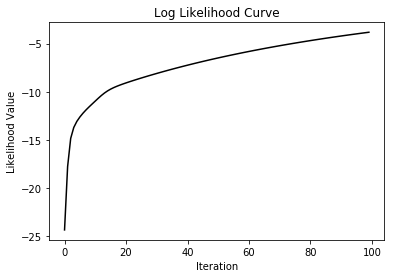

In [4]:
Lambda, Psi, lkhd_list = single_factor_analysis(X, k=2, cycles=100)
plt.plot(lkhd_list, 'k')
plt.xlabel('Iteration')
plt.ylabel('Likelihood Value')
plt.title('Log Likelihood Curve')
print(pd.DataFrame(Lambda))

print("\nCompare implementation to modern sklearn implementation\n")
factor = FactorAnalysis(n_components=2).fit(X)
print(pd.DataFrame(factor.components_.T))

In this example we see that the single factor analysis did succeed in converging to a solution within the default tolerance. In addition, it also had reasonable success finding a set of two factor loadings for the originally sparse data space.  

## Resources
- [The EM Algorithm for Mixtures of Factor Analyzers, Hinton et al. 1997](http://www.cs.toronto.edu/~fritz/absps/tr-96-1.pdf)